In [1]:
from collections import Counter
def raw_majority_vote(labels):
     votes = Counter(labels)
     #print(votes.most_common(2))
     winner, _ = votes.most_common(1)[0]
     #print(votes.most_common(1)[0])
     return winner

In [2]:
raw_majority_vote(['L', 'L', 10, 10, 12])

'L'

In [5]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                        for count in vote_counts.values()
                        if count == winner_count])
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [6]:
raw_majority_vote(['L', 'L', 10, 10, 12])

'L'

In [8]:
from scipy.spatial import distance
def knn_classify(k, labeled_points, new_point):
     """each labeled point should be a pair (point, label)"""

     # order the labeled points from nearest to farthest
     by_distance = sorted(labeled_points,
     key=lambda point: distance.euclidean(point[0], new_point))

     # find the labels for the k closest
     k_nearest_labels = [label for _, label in by_distance[:k]]

     # and let them vote
     return majority_vote(k_nearest_labels)


In [9]:
# each entry is ([longitude, latitude], favorite_language)
cities = [([-122.3 , 47.53], "Python"), # Seattle
 ([-120.3 , 51.53], "Python"), # Random
 ([-121.8 , 42.53], "Python"), # Random
 ([-114.5 , 44.53], "Python"), # Random
 ([-114.1 , 41.33], "Python"), # Random
 ([-104.1 , 40.83], "Python"), # Random
 ([-106.9 , 36.93], "Python"), # Random
 ([-91.3 , 35.99], "Python"), # Random
 ([ -96.85, 32.85], "Java"), # Austin
 ([ -93.85, 29.85], "Java"), # Random
 ([ -95.85, 35.85], "Java"), # Random
 ([ -83.85, 37.45], "Java"), # Random
 ([ -87.95, 33.05], "Java"), # Random
 ([ -104.95, 38.05], "Java"), # Random
 ([ -99.15, 49.05], "Java"), # Random
 ([ -100.1, 43.07], "Java"), # Random
 ([ -89.33, 43.13], "R"), # Madison
 ([ -93.33, 44.53], "R"), # Random
 ([ -91.33, 41.13], "R"), # Random
 ([ -99.33, 45.13], "R"), # Random
 ([ -90.33, 47.53], "R"), # Random
 ([ -104.95, 48.05], "R"), # Random
 ([ -119.95, 34.95], "R"), # Random
 ([ -98.11, 39.95], "R"), # Random
 # ... and so on
]

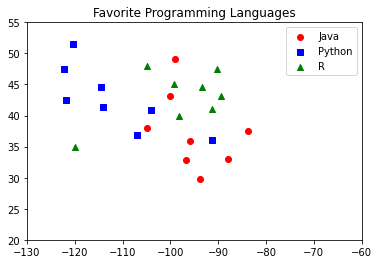

In [12]:
import matplotlib.pyplot as plt
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language], label=language)
                
#plot_state_borders(plt) # pretend we have a function that does this
plt.legend(loc=0)
plt.axis([-130,-60,20,55]) # let matplotlib choose the location
                
# set the axes
plt.title("Favorite Programming Languages")
plt.show()

In [13]:
from collections import Counter
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                         for other_city in cities
                             if other_city != city]
        predicted_language = knn_classify(k, other_cities, location)
        if predicted_language == actual_language:
            num_correct += 1
    print (k, "neighbor[s]:", num_correct, "correct out of", len(cities))

1 neighbor[s]: 13 correct out of 24
3 neighbor[s]: 15 correct out of 24
5 neighbor[s]: 15 correct out of 24
7 neighbor[s]: 17 correct out of 24


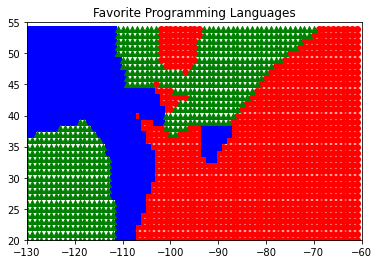

In [17]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
k = 1 # or 3, or 5, or...
for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language], label=language)
#plot_state_borders(plt) # pretend we have a function that does this
#plt.legend(loc=0)
plt.axis([-130,-60,20,55]) # let matplotlib choose the location
                
# set the axes
plt.title("Favorite Programming Languages")
plt.show()

A Maldição da Dimensionalidade

In [18]:
def random_point(dim):
    return [random.random() for _ in range(dim)]


In [19]:
def random_distances(dim, num_pairs):
    return [distance.euclidean(random_point(dim), random_point(dim))
        for _ in range(num_pairs)]

In [21]:
import random
import numpy as np
dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000) # 10,000 random pairs
    avg_distances.append(np.mean(distances)) # track the average
    min_distances.append(min(distances)) # track the minimum

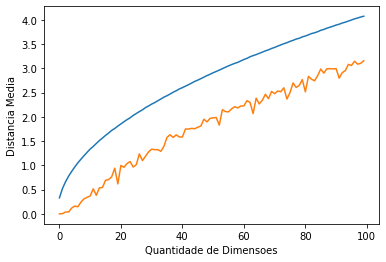

In [22]:
plt.plot(avg_distances)
plt.plot(min_distances)
plt.ylabel('Distancia Media')
plt.xlabel('Quantidade de Dimensoes')
plt.show()

In [24]:
min_avg_ratio = [min_dist / avg_dist
 for min_dist, avg_dist in zip(min_distances, avg_distances)]

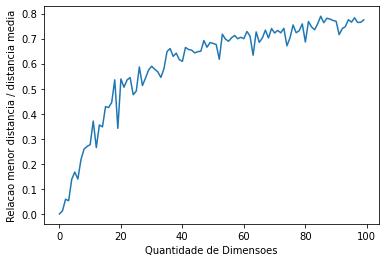

In [25]:
plt.plot(min_avg_ratio)
plt.ylabel('Relacao menor distancia / distancia media')
plt.xlabel('Quantidade de Dimensoes')
plt.show()